In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import numpy as np
df_confirmed = pd.read_csv("covid-19/covid_confirmed_usafacts.csv")
df_death = pd.read_csv("covid-19/covid_deaths_usafacts.csv")
df_population = pd.read_csv("covid-19/covid_county_population_usafacts.csv")


## 1.

[1, 1, 2, 2, 5, 9, 5, 5, 5, 7, 8, 8, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 15, 15, 15, 15, 15, 15, 16, 16, 24, 30, 53, 72, 103, 171, 211, 360, 477, 727, 997, 1325, 1713, 2242, 2841, 3643, 4602, 6113, 8997, 13976, 18838, 26184, 33469, 43544, 53552, 68244, 84666, 102259, 122608, 141409, 163487, 186517, 212915, 241643, 276889, 310597, 335338, 365115]


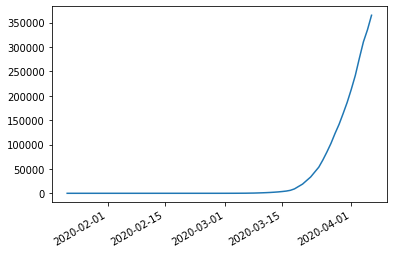

                        week  confirmed
0  2020-01-22 00:00:00+00:00          1
1  2020-01-23 00:00:00+00:00          1
2  2020-01-24 00:00:00+00:00          2
3  2020-01-25 00:00:00+00:00          2
4  2020-01-26 00:00:00+00:00          5
5  2020-01-27 00:00:00+00:00          9
6  2020-01-28 00:00:00+00:00          5
7  2020-01-29 00:00:00+00:00          5
8  2020-01-30 00:00:00+00:00          5
9  2020-01-31 00:00:00+00:00          7
10 2020-02-01 00:00:00+00:00          8
11 2020-02-02 00:00:00+00:00          8
12 2020-02-03 00:00:00+00:00         11
13 2020-02-04 00:00:00+00:00         11
14 2020-02-05 00:00:00+00:00         11
15 2020-02-06 00:00:00+00:00         11
16 2020-02-07 00:00:00+00:00         11
17 2020-02-08 00:00:00+00:00         11
18 2020-02-09 00:00:00+00:00         11
19 2020-02-10 00:00:00+00:00         11
20 2020-02-11 00:00:00+00:00         12
21 2020-02-12 00:00:00+00:00         12
22 2020-02-13 00:00:00+00:00         13
23 2020-02-14 00:00:00+00:00         13


In [163]:
df_confirmed.columns
confirmed = []
date = df_confirmed.columns[4:]
dates = mdates.num2date(mdates.datestr2num(date))
for d in date:
    confirmed.append(sum(df_confirmed[d]))
print(confirmed)

fig, ax = plt.subplots()
ax.plot(dates,confirmed)

fig.autofmt_xdate()
plt.show()
plt.show()
one = pd.DataFrame(list(zip(dates,confirmed)),columns=["week","confirmed"])
pd.set_option('display.max_rows', one.shape[0]+1)
print(one)

## 2.

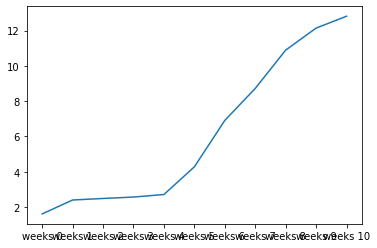

        week  confirmed
0    weeks 0          5
1    weeks 1         11
2    weeks 2         12
3    weeks 3         13
4    weeks 4         15
5    weeks 5         72
6    weeks 6        997
7    weeks 7       6113
8    weeks 8      53552
9    weeks 9     186517
10  weeks 10     365115


In [164]:
df_confirmed.columns
confirmed = []
date = df_confirmed.columns[4:]
# dates = mdates.num2date(mdates.datestr2num(date))
for d in date:
    confirmed.append(sum(df_confirmed[d]))

confirmed_week = []
weeks = []
for i in range(math.ceil(len(confirmed)/7)):
    confirmed_week.append(confirmed[i*7:(i+1)*7][-1])
    weeks.append("weeks {}".format(i))
fig, ax = plt.subplots()
ax.plot(weeks,np.log(confirmed_week))
plt.show()
two = pd.DataFrame(list(zip(weeks,confirmed_week)),columns=["week","confirmed"])
print(two)

## 3.

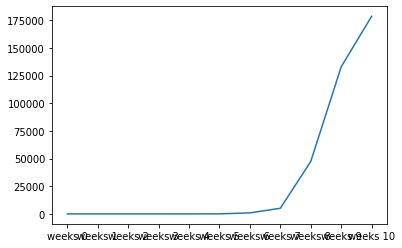

        week  confirmed
0    weeks 0          5
1    weeks 1          6
2    weeks 2          1
3    weeks 3          1
4    weeks 4          2
5    weeks 5         57
6    weeks 6        925
7    weeks 7       5116
8    weeks 8      47439
9    weeks 9     132965
10  weeks 10     178598


In [165]:
difference_cases_per_week = [0]+confirmed_week
difference_cases_per_week = [value-difference_cases_per_week[index] for index,value in enumerate(confirmed_week)]
# print(difference_cases_per_week)
fig, ax = plt.subplots()
ax.plot(weeks,difference_cases_per_week)
plt.show()
three = pd.DataFrame(list(zip(weeks,difference_cases_per_week)),columns=["week","confirmed"])
print(three)

## 4.

In [166]:
df_death.fillna(0,inplace=True)
death = []
date = df_death.columns[4:]
dates = mdates.num2date(mdates.datestr2num(date))
for d in date:
    death.append(sum(df_death[d]))

c:\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


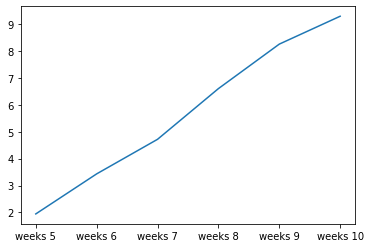

        week    death
0    weeks 0      0.0
1    weeks 1      0.0
2    weeks 2      0.0
3    weeks 3      0.0
4    weeks 4      0.0
5    weeks 5      7.0
6    weeks 6     31.0
7    weeks 7    112.0
8    weeks 8    737.0
9    weeks 9   3850.0
10  weeks 10  10848.0


In [167]:
df_death.columns
death = []
date = df_death.columns[4:]
# dates = mdates.num2date(mdates.datestr2num(date))
for d in date:
    death.append(sum(df_death[d]))

death_week = []
weeks = []
for i in range(math.ceil(len(death)/7)):
    death_week.append(death[i*7:(i+1)*7][-1])
    weeks.append("weeks {}".format(i))
fig, ax = plt.subplots()
ax.plot(weeks,np.log(death_week))
plt.show()
four = pd.DataFrame(list(zip(weeks,death_week)),columns=["week","death"])
print(four)

## 5.

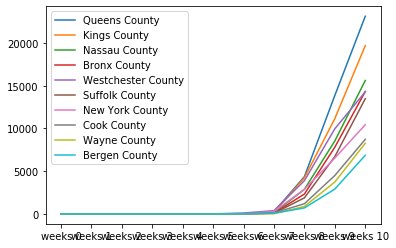

In [168]:
df_confirmed.columns
confirmed_sorted = df_confirmed.sort_values(by=[df_confirmed.columns.values.tolist()[-1]],ascending=False)

confirmed_sorted = confirmed_sorted.head(10)
date = df_confirmed.columns[4:]

# dates = mdates.num2date(mdates.datestr2num(date))
lines_y_tmp = []
lines_y = []
# for county in range(10):
for index in range(10):
    tmp = []
    for d in date:
        tmp.append(confirmed_sorted.iloc[index][d])
    lines_y_tmp.append(tmp)
confirmed_week = []
weeks = []
for i in range(math.ceil(len(lines_y_tmp[index])/7)):
    weeks.append("weeks {}".format(i))
for index in range(10):
    tmp = []
    for i in range(math.ceil(len(lines_y_tmp[index])/7)):
        tmp.append(lines_y_tmp[index][i*7:(i+1)*7][-1])
    lines_y.append(tmp)

fig, ax = plt.subplots()
for i in range(10):

    ax.plot(weeks,lines_y[i],label=confirmed_sorted.iloc[i]["County Name"])
plt.legend()
plt.show()

## 6.

No handles with labels found to put in legend.


      countyFIPS         County Name State  stateFIPS     4/6/2020
3194       56045       Weston County    WY         56     0.000000
971        20131       Nemaha County    KS         20     0.000000
973        20135         Ness County    KS         20     0.000000
974        20137       Norton County    KS         20     0.000000
978        20145       Pawnee County    KS         20     0.000000
...          ...                 ...   ...        ...          ...
1892       36059       Nassau County    NY         36  1150.838219
1168       22071      Orleans Parish    LA         22  1170.080791
1922       36119  Westchester County    NY         36  1477.406858
1906       36087     Rockland County    NY         36  1750.519508
571        16013       Blaine County    ID         16  1837.452761

[3142 rows x 5 columns]


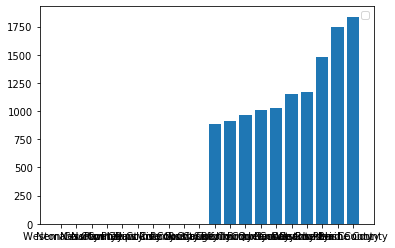

           County Name  Confirmed per population
0        Weston County                  0.000000
1        Nemaha County                  0.000000
2          Ness County                  0.000000
3        Norton County                  0.000000
4        Pawnee County                  0.000000
5      Phillips County                  0.000000
6       Rawlins County                  0.000000
7          Rice County                  0.000000
8         Rooks County                  0.000000
9          Rush County                  0.000000
10       Orange County                882.475191
11      Suffolk County                913.381475
12     Richmond County                961.685880
13        Bronx County               1010.219242
14       Queens County               1026.373445
15       Nassau County               1150.838219
16      Orleans Parish               1170.080791
17  Westchester County               1477.406858
18     Rockland County               1750.519508
19       Blaine Coun

In [177]:
confirmed_per_pop = df_confirmed[df_confirmed.columns[0:4].values.tolist()+[df_confirmed.columns[-1]]][df_population.population!=0]
confirmed_per_pop[df_confirmed.columns[-1]] = confirmed_per_pop[df_confirmed.columns[-1]] * 100000 / df_population.population[df_population.population!=0]

confirmed_per_pop = confirmed_per_pop.sort_values(by=[confirmed_per_pop.columns[-1]])
print(confirmed_per_pop)
county_name = confirmed_per_pop['County Name'].head(10).values.tolist() + confirmed_per_pop['County Name'].tail(10).values.tolist()
confirmed_10_per_pop = confirmed_per_pop[df_confirmed.columns[-1]].head(10).values.tolist() + confirmed_per_pop[df_confirmed.columns[-1]].tail(10).values.tolist()
fig, ax = plt.subplots()
ax.bar(county_name,confirmed_10_per_pop)
plt.legend()
plt.show()
four = pd.DataFrame(list(zip(county_name,confirmed_10_per_pop)),columns=["County Name","Confirmed per population"])
print(four)

## 7.

In [178]:
seven = df_confirmed.copy()
seven["last_day_death"] = df_death["4/6/2020"]
seven = seven[(df_confirmed["4/6/2020"]!=0)&(df_death["4/6/2020"]!=0)]
# seven["division"] = 
seven["deathrate"] = seven["last_day_death"] / seven["4/6/2020"]
seven.deathrate.describe().iloc[1:3]

c:\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


mean    0.081657
std     0.139282
Name: deathrate, dtype: float64

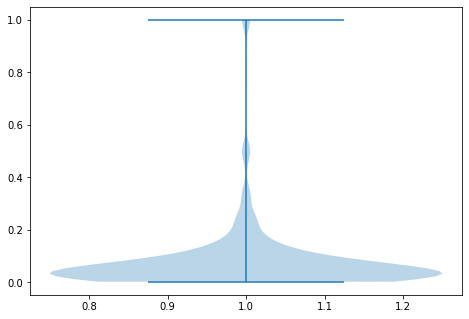

In [179]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bp = ax.violinplot(seven["deathrate"])
plt.show()

## 8


      countyFIPS      County Name State  stateFIPS  1/22/2020  1/23/2020  \
1865       36005     Bronx County    NY         36          0          0   
1886       36047     Kings County    NY         36          0          0   
1893       36061  New York County    NY         36          0          0   
1903       36081    Queens County    NY         36          0          0   
1905       36085  Richmond County    NY         36          0          0   

      1/24/2020  1/25/2020  1/26/2020  1/27/2020  ...  3/28/2020  3/29/2020  \
1865          0          0          0          0  ...       5752       6250   
1886          0          0          0          0  ...       8129       8887   
1893          0          0          0          0  ...       5237       5582   
1903          0          0          0          0  ...       9831      10737   
1905          0          0          0          0  ...       1781       1984   

      3/30/2020  3/31/2020  4/1/2020  4/2/2020  4/3/2020  4/4/2020  

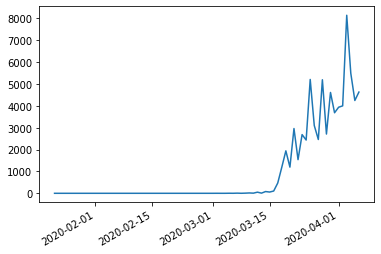

In [194]:
NYC_county = [36005,36047,36061,36081,36085]
NYC_confirmed = df_confirmed[(df_confirmed["countyFIPS"]==36005) |
                             (df_confirmed["countyFIPS"]==36047) |
                            (df_confirmed["countyFIPS"]==36061) |
                            (df_confirmed["countyFIPS"]==36081) |
                            (df_confirmed["countyFIPS"]==36085) ]
NYC_confirmed_lst = []
date = NYC_confirmed.columns[4:]
dates = mdates.num2date(mdates.datestr2num(date))
for d in date:
    NYC_confirmed_lst.append(sum(NYC_confirmed[d]))
# print(NYC_confirmed_lst)
NYC_confirmed_lst = [0] + NYC_confirmed_lst
NYC_confirmed_lst = [NYC_confirmed_lst[i] - NYC_confirmed_lst[i-1] for i in range(1,len(NYC_confirmed_lst))]
print(NYC_confirmed)
fig, ax = plt.subplots()
ax.plot(dates,NYC_confirmed_lst)

fig.autofmt_xdate()
plt.show()

      countyFIPS  County Name State  stateFIPS  1/22/2020  1/23/2020  \
3019       53033  King County    WA         53          1          1   

      1/24/2020  1/25/2020  1/26/2020  1/27/2020  ...  3/28/2020  3/29/2020  \
3019          1          1          1          1  ...       2077       2161   

      3/30/2020  3/31/2020  4/1/2020  4/2/2020  4/3/2020  4/4/2020  4/5/2020  \
3019       2330       2330      2496      2656      2711      2865      3158   

      4/6/2020  
3019      3295  

[1 rows x 80 columns]


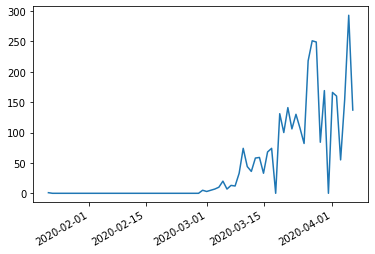

In [196]:
#FIXME: rename this
NYC_confirmed = df_confirmed[(df_confirmed["countyFIPS"]==53033) ]
NYC_confirmed_lst = []
date = NYC_confirmed.columns[4:]
dates = mdates.num2date(mdates.datestr2num(date))
for d in date:
    NYC_confirmed_lst.append(sum(NYC_confirmed[d]))
# print(NYC_confirmed_lst)
NYC_confirmed_lst = [0] + NYC_confirmed_lst
NYC_confirmed_lst = [NYC_confirmed_lst[i] - NYC_confirmed_lst[i-1] for i in range(1,len(NYC_confirmed_lst))]
print(NYC_confirmed)
fig, ax = plt.subplots()
ax.plot(dates,NYC_confirmed_lst)

fig.autofmt_xdate()
plt.show()

## Names

## 1.

In [299]:
import os
df = None
for root, dirs, files in os.walk("names", topdown=False):
    first = True

    for name in files:
#         print(os.path.join(root, name))
        if name[-1]!='t':
            continue
        df_tmp = pd.read_csv(os.path.join(root, name),names=['name',"sex","occ"],lineterminator='\n',encoding='latin-1')
#         df_tmp['number'] = len(df_tmp)
        df_tmp['year'] = os.path.join(root, name)[-8:-4]
        df_tmp = df_tmp[['year','name','sex','occ']]
        if first:
            df = df_tmp
            first = False
        else:
            df = pd.concat([df,df_tmp],ignore_index=True)
#         lst.append(df_tmp)
#     df = pd.concat(lst,ignore_index=True)

df = df.sample(frac=1).reset_index(drop=True)
print(df)
split = len(df)//100000
training_set = df.iloc[split:]
test_set = df.iloc[0:split]
print(training_set)
print(test_set)

         year      name sex  occ
0        1925    Adline   F   28
1        2006     Aarna   F   18
2        1970    Bradey   M    8
3        1996  Deondrea   M    5
4        2012    Adrick   M   18
...       ...       ...  ..  ...
1957041  1961     Bryon   M  305
1957042  2013   Rowland   M   12
1957043  1917   Rubymae   F    6
1957044  2002   Marialy   F    5
1957045  2004   Charnay   F    8

[1957046 rows x 4 columns]
         year     name sex  occ
19       1893   Jasper   M   72
20       2015    Jeric   M    7
21       1991   Morgen   M   11
22       1991  Michale   F    6
23       1894    Edson   M    5
...       ...      ...  ..  ...
1957041  1961    Bryon   M  305
1957042  2013  Rowland   M   12
1957043  1917  Rubymae   F    6
1957044  2002  Marialy   F    5
1957045  2004  Charnay   F    8

[1957027 rows x 4 columns]
    year      name sex   occ
0   1925    Adline   F    28
1   2006     Aarna   F    18
2   1970    Bradey   M     8
3   1996  Deondrea   M     5
4   2012    Adrick 

## 2.

In [300]:
model = training_set.groupby(['name','sex']).sum()
model = model.reset_index()
name = test_set.name.values.tolist()
sex = test_set.sex.values.tolist()
total = 0
acc= 0
def check_sex(model,label,name):
    m = 0
    f = 0
    m = int(model['occ'][(model.name==name) & (model.sex == 'M')]) if len(model[(model.name==name) & (model.sex == 'M')]) else 0
    f = int(model['occ'][(model.name==name) & (model.sex == 'F')]) if len(model[(model.name==name) & (model.sex == 'F')]) else 0 
    if f>m and label == 'F':
        return True
    if m>f and label == 'M':
        return True
    return False
# check_sex(model,'M','Aabha')
for index,n in enumerate(name):
    if check_sex(model,sex[index],n):
        acc+=1
    total+=1
print(acc/total)

0.8947368421052632


## 3.

In [327]:
from sklearn import tree
name_lst = training_set.name.values.tolist()
X_name = training_set['name'].values.tolist()
print(X_name[0])
dic = dict()
nid = 0
for name in X_name:
    if name in dic:
        continue
    dic[name] = nid
    nid+=1
nid_lst = [dic[name] for name in X_name]
min(nid_lst)

# X = training_set[['year','name','occ']].values.tolist()
# Y = training_set.sex.values.tolist()

Jasper


0

In [330]:
training_set['nid'] = nid_lst
X = training_set[['year','nid','occ']].values.tolist()
Y = training_set.sex.values.tolist()
clf = tree.DecisionTreeClassifier()
clf.fit(X,Y)

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [333]:
total = 0
acc= 0

test_name = test_set['name'].values.tolist()
test_nid_lst = [dic[name] for name in test_name]
test_set['nid'] = test_nid_lst
test_X = test_set[['year','nid','occ']].values.tolist()
test_Y = test_set.sex.values.tolist()


c:\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[['1925', 17200, 28],
 ['2006', 16413, 18],
 ['1970', 20901, 8],
 ['1996', 44657, 5],
 ['2012', 7329, 18],
 ['1995', 17944, 22],
 ['1942', 1933, 6635],
 ['1986', 35401, 16],
 ['1883', 22358, 8],
 ['1957', 10478, 112],
 ['1915', 12374, 11],
 ['1987', 52785, 8],
 ['2009', 20568, 9],
 ['1999', 45757, 22],
 ['1980', 26101, 8],
 ['2017', 39739, 26],
 ['1985', 25500, 6],
 ['1949', 19802, 9],
 ['1996', 43921, 8]]

In [338]:
test_pred = clf.predict(test_X)

In [340]:
acc = 0
total = 0
for index,value in enumerate(test_pred):
    if test_Y[index] == value:
        acc+=1
    total+=1
print(acc/total)

0.8421052631578947
